# Neural Network

## Outline
- Pendahuluan Neural Network
- Contoh sistem kerja Neural Network
- Neural Network menggunakan Tensorflow dan Keras
- Long Short Term Memory (LSTM)
- LSTM for forcasting
- LSTM for anomaly detection

## Pendahuluan Neural Network
<br><br>
<img src="images/neural network.jpg" />

- Terdapat beberapa *activation function*, di antaranya sebagai berikut:
<img src="images/activation functions.jpg" width=500 height=500/>

- Struktur dasar NN
<img src="images/struktur neural network.jpg"/>


## Contoh sistem kerja Neural Network
link: https://youtu.be/o20mBWPHGEw

<div style="text-align: center">
    <video align="center" controls src="videos/neural network.mp4" width="560" height="315">

## Neural Network menggunakan Tensorflow dan Keras

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load Dataset Harga Rumah
# link: https://www.kaggle.com/wisnuanggara/daftar-harga-rumah?select=DATA+RUMAH.xlsx

harga_rumah = pd.read_excel('data/DATA RUMAH.xlsx')
harga_rumah.head(10)

NO                                         NAMA RUMAH        HARGA   LB  \
0   1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000  220   
1   2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000  180   
2   3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000  267   
3   4           Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   40   
4   5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000  400   
5   6  Rumah Mewah Modern Murah 3 lantai di Tebet Jak...   4970000000  300   
6   7  Rumah lama di Tebet, dekat MT Haryono dan tol ...   2600000000  120   
7   8  RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...  10500000000  350   
8   9  Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...   3250000000  125   
9  10  Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...   4500000000  250   

    LT  KT  KM  GRS  
0  220   3   3    0  
1  137   4   3    2  
2  250   4   4    4  
3   25   2   2    0  
4  355   6   5    3  
5  154   5   3    3  
6  150   3   2    1  
7  247   4   4    0  
8   90   3   3    0  
9   96   5   4    1

In [3]:
harga_rumah.drop(['NO', 'NAMA RUMAH'], axis = 1, inplace = True)
harga_rumah.head(10)

HARGA   LB   LT  KT  KM  GRS
0   3800000000  220  220   3   3    0
1   4600000000  180  137   4   3    2
2   3000000000  267  250   4   4    4
3    430000000   40   25   2   2    0
4   9000000000  400  355   6   5    3
5   4970000000  300  154   5   3    3
6   2600000000  120  150   3   2    1
7  10500000000  350  247   4   4    0
8   3250000000  125   90   3   3    0
9   4500000000  250   96   5   4    1

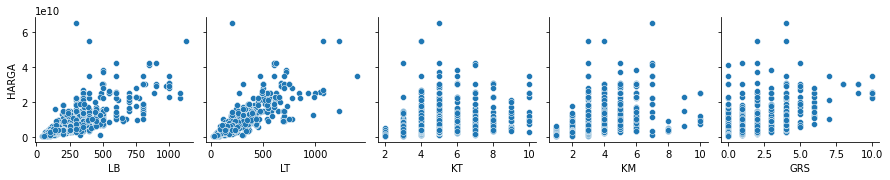

In [8]:
import seaborn as sns

sns.pairplot(harga_rumah,
             x_vars=['LB','LT','KT','KM','GRS'],
             y_vars=['HARGA'])

In [9]:
X = harga_rumah[['LB','LT','KT','KM','GRS']]
y = harga_rumah[['HARGA']]/10**9 # harga dalam satuan 1 miliar rupiah

# Check the shape of training data
print(X.shape,y.shape)

(1010, 5) (1010, 1)


In [112]:
X.head(), y.head()

(    LB   LT  KT  KM  GRS
 0  220  220   3   3    0
 1  180  137   4   3    2
 2  267  250   4   4    4
 3   40   25   2   2    0
 4  400  355   6   5    3,
    HARGA
 0   3.80
 1   4.60
 2   3.00
 3   0.43
 4   9.00)

In [10]:
# Create training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# Set up the network

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(5,))) # First Hidden Layer with relu activation function
model.add(Dense(64, activation='relu'))                    # Second Hidden Layer with relu activation function
model.add(Dense(1, activation='linear'))                   # Output Layer without or linear activation function 

# Configure the network with optimizer and loss function

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100,
                    validation_split=0.1, verbose=1)

Epoch 1/100
20/20 [==============================] - 16s 30ms/step - loss: 99.8829 - val_loss: 89.0911
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 95.3210 - val_loss: 64.3680
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 72.9478 - val_loss: 31.6624
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 44.2281 - val_loss: 22.8983
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 45.4881 - val_loss: 20.2405
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 36.6818 - val_loss: 17.9106
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 26.6330 - val_loss: 15.7826
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 25.3773 - val_loss: 13.8198
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 23.8135 - val_loss: 12.0045
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 19.0216 - val_l

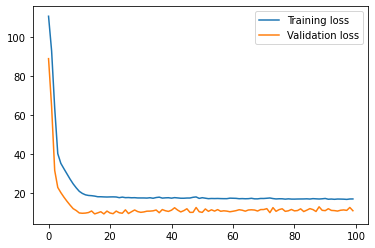

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [16]:
# MSE test data
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

11.792815452927956

In [17]:
hasil = pd.DataFrame()
hasil['HARGA']=y_test.HARGA
hasil['HARGA_PREDIKSI']=y_pred
hasil

HARGA  HARGA_PREDIKSI
915   2.400        3.771047
701   3.250        6.176735
293   2.999        3.367759
507   6.000        5.975505
970   2.750        3.374276
..      ...             ...
457   3.500        3.859187
428  11.500       12.875116
61   18.000       10.573299
541   3.975        7.088748
335  14.500        9.854795

[303 rows x 2 columns]

In [130]:
# save model
model.save('deployment/model_harga_rumah_NN')

INFO:tensorflow:Assets written to: deployment/model_harga_rumah_NN\assets


In [12]:
# Load the model from the file
load_model = keras.models.load_model('deployment/model_boston_NN')

## Long Short Term Memory (LSTM)

- Struktur Recurrent Neural Network (RNN) 
<img src="images/struktur rnn.jpg" />

- RNN Vs LSTM
<img src="images/RNN VS LSTM.jpg" />

- Cara kerja LSTM
<img src="images/forget gate.gif" width=700 />
<img src="images/input gate.gif" width=700 />
<img src="images/cell state.gif" width=700 />
<img src="images/output gate.gif" width=700 />

## LSTM for forecasting

- Sliding Window
<img src="images/sliding window.gif" width=700 />

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# Load Data: estimasi konsumsi energi dari perusahan American Electric Power (AEP) dalam satuan Megawatt (MW)
# link: https://www.kaggle.com/robikscube/hourly-energy-consumption

df = pd.read_csv('data/AEP_hourly.csv')
df['Date'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Date').reset_index(drop=True)
df = df[['Date','AEP_MW']]
print(df['Date'].min(),df['Date'].max())
print(df['Date'].max()-df['Date'].min())
df.head()

2004-10-01 01:00:00 2018-08-03 00:00:00
5053 days 23:00:00


Date   AEP_MW
0 2004-10-01 01:00:00  12379.0
1 2004-10-01 02:00:00  11935.0
2 2004-10-01 03:00:00  11692.0
3 2004-10-01 04:00:00  11597.0
4 2004-10-01 05:00:00  11681.0

In [7]:
# Data dari tahun 2017

ts = df[df['Date']>='2017'].reset_index(drop=True)

print(ts['Date'].max()-ts['Date'].min())
ts['Date'].min(),ts['Date'].max()

579 days 00:00:00


(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-08-03 00:00:00'))

<AxesSubplot:xlabel='Date', ylabel='AEP_MW'>

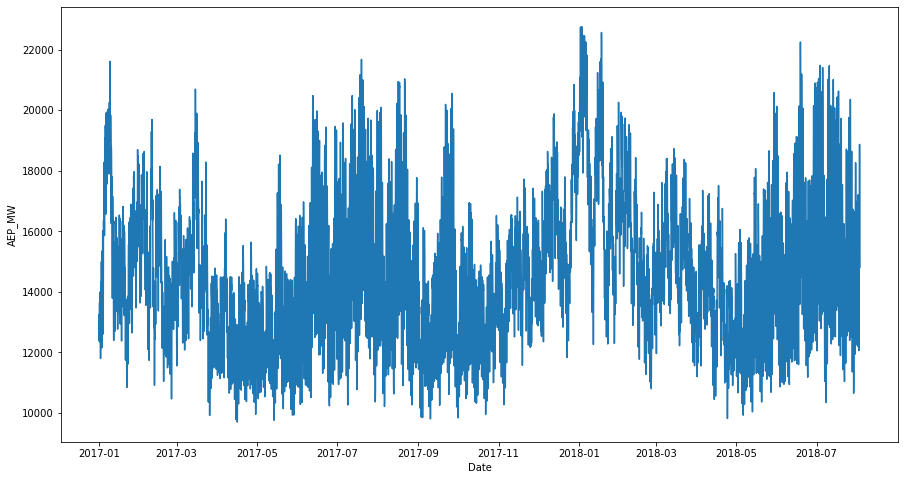

In [4]:
# Plot Data
plt.figure(figsize=(15,8))
sns.lineplot(data=ts,x='Date', y='AEP_MW')

In [8]:
# Nomalisasi Data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(ts[['AEP_MW']])
ts['scaled'] = scaler.transform(ts[['AEP_MW']])
ts.head()

Date   AEP_MW    scaled
0 2017-01-01 00:00:00  13240.0  0.271189
1 2017-01-01 01:00:00  12876.0  0.243320
2 2017-01-01 02:00:00  12591.0  0.221499
3 2017-01-01 03:00:00  12487.0  0.213536
4 2017-01-01 04:00:00  12369.0  0.204502

In [9]:
# Create sliding window
window_size = 24

sub_seq, next_values = [], []
for i in range(len(ts[['scaled']])-window_size):  
    sub_seq.append(ts[['scaled']][i:i+window_size])
    next_values.append(ts['scaled'][i+window_size])
X = np.array(sub_seq)
y = np.array([next_values]).T

In [24]:
print(X.shape)
print(y.shape)

(13872, 24, 1)
(13872, 1)


In [11]:
# Create training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [13]:
# Set up network
model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit model

history = model.fit(X_train,y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
274/274 [==============================] - 29s 21ms/step - loss: 0.0372 - val_loss: 0.0030
Epoch 2/100
274/274 [==============================] - 5s 17ms/step - loss: 0.0024 - val_loss: 0.0067
Epoch 3/100
274/274 [==============================] - 5s 17ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
274/274 [==============================] - 4s 16ms/step - loss: 8.8437e-04 - val_loss: 0.0013
Epoch 5/100
274/274 [==============================] - 5s 17ms/step - loss: 6.7891e-04 - val_loss: 6.5538e-04
Epoch 6/100
274/274 [==============================] - 5s 17ms/step - loss: 5.7188e-04 - val_loss: 9.0232e-04
Epoch 7/100
274/274 [==============================] - 4s 16ms/step - loss: 6.3120e-04 - val_loss: 0.0012
Epoch 8/100
274/274 [==============================] - 5s 16ms/step - loss: 5.8359e-04 - val_loss: 5.3702e-04
Epoch 9/100
274/274 [==============================] - 5s 18ms/step - loss: 5.0002e-04 - val_loss: 5.1693e-04
Epoch 10/100
274/274 [===================

274/274 [==============================] - 4s 15ms/step - loss: 2.3331e-04 - val_loss: 2.2894e-04
Epoch 76/100
274/274 [==============================] - 4s 15ms/step - loss: 2.1610e-04 - val_loss: 1.9651e-04
Epoch 77/100
274/274 [==============================] - 4s 15ms/step - loss: 2.1839e-04 - val_loss: 2.6898e-04
Epoch 78/100
274/274 [==============================] - 4s 15ms/step - loss: 2.0705e-04 - val_loss: 1.8849e-04
Epoch 79/100
274/274 [==============================] - 4s 16ms/step - loss: 1.9919e-04 - val_loss: 2.7347e-04
Epoch 80/100
274/274 [==============================] - 4s 15ms/step - loss: 1.9138e-04 - val_loss: 2.4329e-04
Epoch 81/100
274/274 [==============================] - 4s 15ms/step - loss: 2.0127e-04 - val_loss: 2.0528e-04
Epoch 82/100
274/274 [==============================] - 4s 15ms/step - loss: 2.0691e-04 - val_loss: 3.2645e-04
Epoch 83/100
274/274 [==============================] - 4s 16ms/step - loss: 2.0679e-04 - val_loss: 1.9912e-04
Epoch 84/100
2

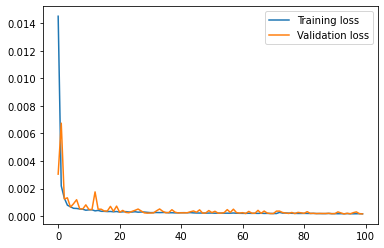

In [15]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [16]:
mse = model.evaluate(X_test,y_test)
mse

131/131 [==============================] - ETA: 0s - loss: 1.7354e-0 - 1s 6ms/step - loss: 1.7311e-04


0.00017310834664385766

In [17]:
# save model
model.save("deployment/LSTM Anomaly Detection (Unsupervised)/Forecasting_AEP_MW")

INFO:tensorflow:Assets written to: deployment/LSTM Anomaly Detection (Unsupervised)/Forecasting_AEP_MW\assets


In [50]:
hasil = pd.DataFrame()
hasil['Date'] = ts['Date'][-(len(y_test)):].reset_index(drop=True)
hasil['y_test'] = scaler.inverse_transform(y_test)
hasil['y_hat'] = scaler.inverse_transform(model.predict(X_test))

In [32]:
hasil.tail(10)

Date   y_test         y_hat
4152 2018-08-02 15:00:00  18534.0  18539.355469
4153 2018-08-02 16:00:00  18826.0  18830.996094
4154 2018-08-02 17:00:00  18869.0  18943.330078
4155 2018-08-02 18:00:00  18562.0  18740.296875
4156 2018-08-02 19:00:00  18118.0  18177.220703
4157 2018-08-02 20:00:00  17673.0  17654.826172
4158 2018-08-02 21:00:00  17303.0  17205.423828
4159 2018-08-02 22:00:00  17001.0  16738.662109
4160 2018-08-02 23:00:00  15964.0  15872.733398
4161 2018-08-03 00:00:00  14809.0  14695.007812

Text(0, 0.5, 'AEP_MW')

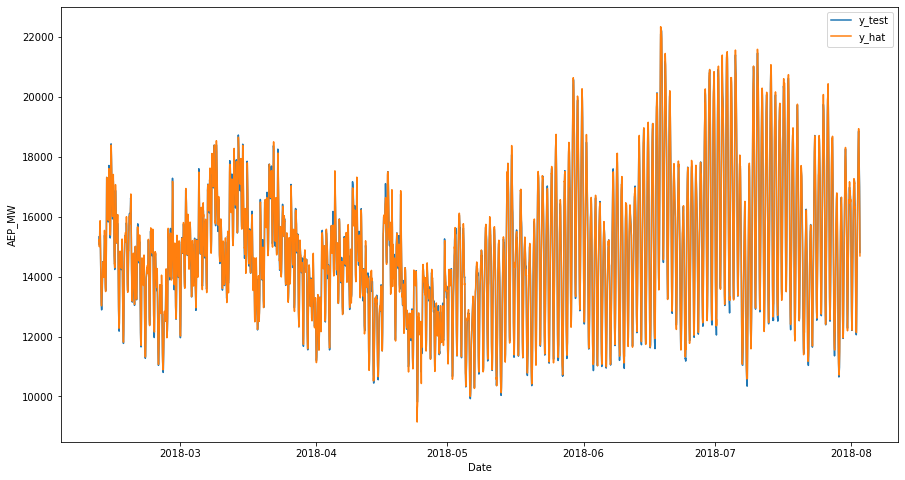

In [40]:
# Plot Data Test
plt.figure(figsize=(15,8))
sns.lineplot(data=hasil,x='Date', y='y_test', label = 'y_test')
sns.lineplot(data=hasil,x='Date', y='y_hat', label = 'y_hat')
plt.ylabel('AEP_MW')

Text(0, 0.5, 'AEP_MW')

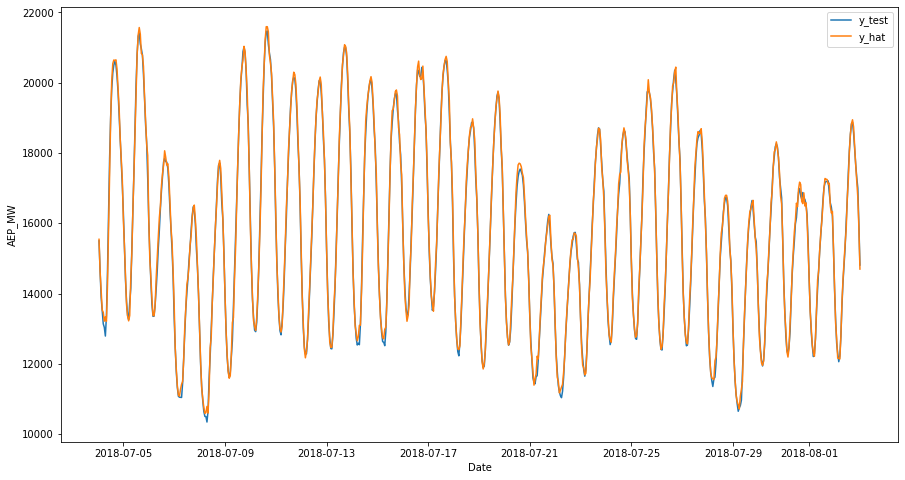

In [43]:
# Plot Data Sebulan terakhir
plt.figure(figsize=(15,8))
sns.lineplot(data=hasil[-24*30:],x='Date', y='y_test', label = 'y_test')
sns.lineplot(data=hasil[-24*30:],x='Date', y='y_hat', label = 'y_hat')
plt.ylabel('AEP_MW')

In [52]:
# prediksi konsumsi energi seminggu kedepan

n_future = 24*7
for i in range(n_future):
    X_future = scaler.transform(hasil[['y_hat']][-window_size:]).reshape(1,window_size,1)
    new_y_hat = scaler.inverse_transform(model.predict(X_future))[0,0]
    new_time = hasil['Date'].iloc[-1] + pd.DateOffset(hours=1)
    hasil.loc[len(hasil)] = [new_time,np.nan,new_y_hat]

Text(0, 0.5, 'AEP_MW')

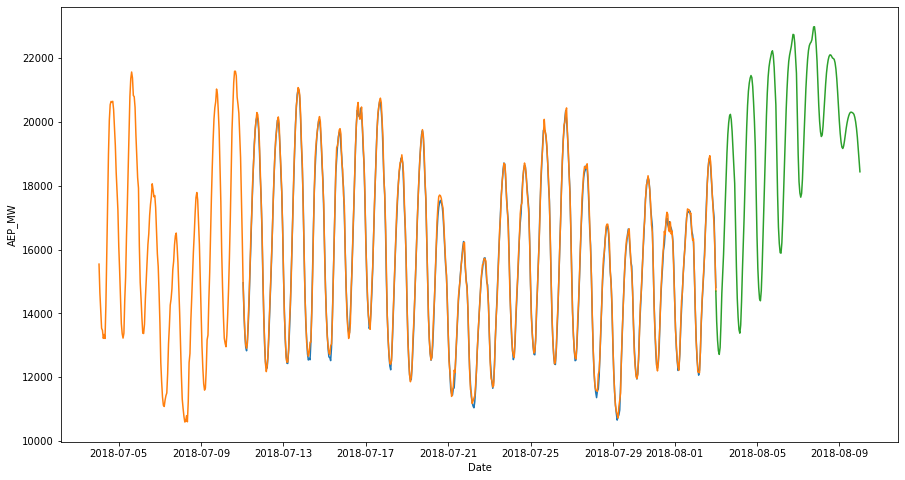

In [72]:
# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(15,8))
sns.lineplot(data=hasil[-24*30:],x='Date', y='y_test')
sns.lineplot(data=hasil[-(24*30+n_future):-n_future],x='Date', y='y_hat')
sns.lineplot(data=hasil[-(n_future+1):],x='Date', y='y_hat')
plt.ylabel('AEP_MW')

## Deteksi Anomali
Dapat dilakukan dengan cara Unsupervised ataupun Supervised. Langkah awal dari kedua cara tersebut sama-sama perlu membuat model forecasting seperti di atas
- Unsupervised: dilakukan dengan memilih threshold atau nilai batas dari nilai error mutlak terbesar pada data train. kemudian data pada data test yang memiliki nilai error mutlak melebihi threshold tersebut dapat diindikasikan sebagai anomali
<br>
<br>
- Supervised: misal terdapat *n* anomali pada data test, maka threshold dipilih dengan cara memilih nilai mutlak terbesar ke *n* pada data test. kemudian data pada data test yang memiliki nilai error mutlak melebihi threshold tersebut dapat diindikasikan sebagai anomali

threshold error mutlak: 0.0890438496934155


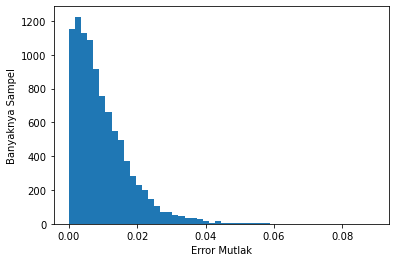

In [18]:
# Deteksi Anomali (Unsupervised)

# Menentukan threshold (nilai batas suatu data dikatakan anomali)
train_abs_error = np.abs(y_train - model.predict(X_train))

plt.hist(train_abs_error, bins=50)
plt.xlabel('Error Mutlak')
plt.ylabel('Banyaknya Sampel');

threshold = np.max(train_abs_error)
print(f'threshold error mutlak: {threshold}')

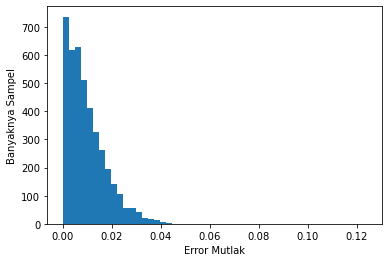

In [19]:
test_abs_error = np.abs(y_test - model.predict(X_test))

plt.hist(test_abs_error, bins=50)
plt.xlabel('Error Mutlak')
plt.ylabel('Banyaknya Sampel');

In [20]:
import plotly.graph_objects as go

In [21]:
test_score_df = pd.DataFrame()
test_score_df['Date'] = ts['Date'][-(len(y_test)):].reset_index(drop=True)
test_score_df['AEP_MW'] = ts['AEP_MW'][-(len(y_test)):].reset_index(drop=True)
test_score_df['loss'] = test_abs_error
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']

test_score_df.head(10)

Date   AEP_MW      loss  threshold  anomaly
0 2018-02-10 14:00:00  15330.0  0.015745   0.089044    False
1 2018-02-10 15:00:00  15115.0  0.002266   0.089044    False
2 2018-02-10 16:00:00  15060.0  0.005544   0.089044    False
3 2018-02-10 17:00:00  15123.0  0.001970   0.089044    False
4 2018-02-10 18:00:00  15416.0  0.000526   0.089044    False
5 2018-02-10 19:00:00  15696.0  0.015475   0.089044    False
6 2018-02-10 20:00:00  15559.0  0.033990   0.089044    False
7 2018-02-10 21:00:00  15401.0  0.008065   0.089044    False
8 2018-02-10 22:00:00  14999.0  0.021856   0.089044    False
9 2018-02-10 23:00:00  14433.0  0.007170   0.089044    False

In [22]:
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies

Date   AEP_MW      loss  threshold  anomaly
1605 2018-04-18 12:00:00  15031.0  0.113549   0.089044     True
1738 2018-04-24 01:00:00  10158.0  0.124090   0.089044     True
1762 2018-04-25 01:00:00  11979.0  0.114269   0.089044     True

In [23]:
# grafik nilai error mutlak dan threshold
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=test_score_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Date'], y=test_score_df['AEP_MW'], name='AEP_MW'))
fig.add_trace(go.Scatter(x=anomalies['Date'], y=anomalies['AEP_MW'], mode='markers', name='Anomaly'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()

<AxesSubplot:>

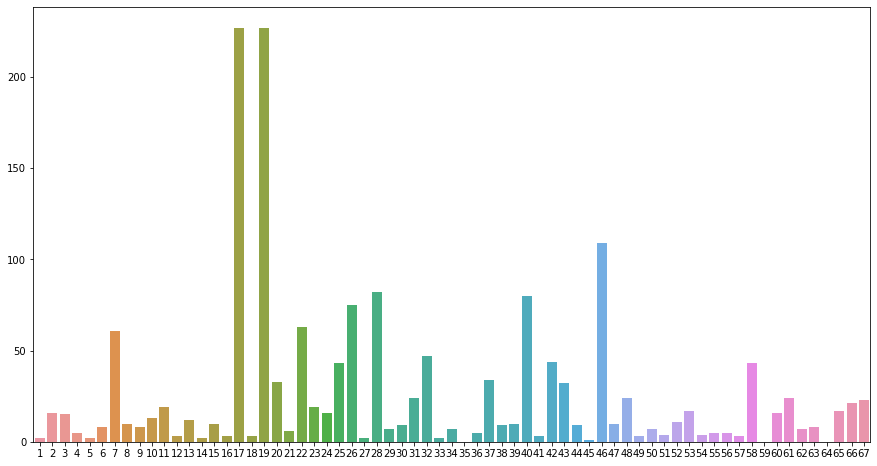

In [74]:
# Deteksi Anomali (Supervised)

# load Data web traffic dari Yahoo! Webscope program
# link: https://webscope.sandbox.yahoo.com/catalog.php?datatype=s&did=70

N_anom = []
for i in range(67):
    df2 = pd.read_csv("data/web traffic anomaly/A1Benchmark/real_"+str(i+1)+".csv")
    N_anom.append(sum(df2['is_anomaly']))

plt.figure(figsize=(15,8))
sns.barplot(x=[i for i in range(1,68)], y=N_anom)

In [75]:
df2 = pd.read_csv("data/web traffic anomaly/A1Benchmark/real_17.csv")
df2.head(10)

timestamp  value  is_anomaly
0          1      0           0
1          2     61           0
2          3   1495           0
3          4   1208           0
4          5   1347           0
5          6   1483           0
6          7    776           0
7          8    769           0
8          9    882           0
9         10   1249           0

<AxesSubplot:xlabel='timestamp', ylabel='value'>

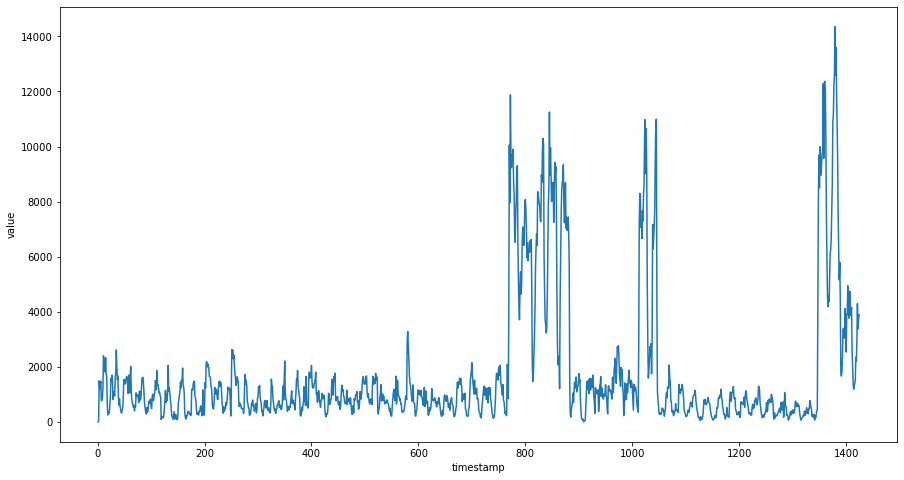

In [78]:
# Plot Data
plt.figure(figsize=(15,8))
sns.lineplot(data=df2,x='timestamp', y='value')

In [79]:
# Nomalisasi Data

from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
scaler2 = scaler2.fit(df2[['value']])
df2['scaled'] = scaler2.transform(df2[['value']])
df2.head(10)

timestamp  value  is_anomaly    scaled
0          1      0           0  0.000000
1          2     61           0  0.004250
2          3   1495           0  0.104159
3          4   1208           0  0.084164
4          5   1347           0  0.093848
5          6   1483           0  0.103323
6          7    776           0  0.054065
7          8    769           0  0.053578
8          9    882           0  0.061451
9         10   1249           0  0.087020

In [81]:
# Create sliding window
window_size = 24

sub_seq, next_values = [], []
for i in range(len(df2[['scaled']])-window_size):  
    sub_seq.append(df2[['scaled']][i:i+window_size])
    next_values.append(df2['scaled'][i+window_size])
X = np.array(sub_seq)
y = np.array([next_values]).T

In [84]:
print(X.shape)
print(y.shape)

(1400, 24, 1)
(1400, 1)


In [85]:
# Create training and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [166]:
# Set up network

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences = True, input_shape=(window_size, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 24, 50)            10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [193]:
# fit model

history = model.fit(X_train,y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 7.4049e-04
Epoch 2/100
28/28 [==============================] - 1s 23ms/step - loss: 0.0013 - val_loss: 7.4255e-04
Epoch 3/100
28/28 [==============================] - 1s 24ms/step - loss: 0.0013 - val_loss: 7.0897e-04
Epoch 4/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 7.0194e-04
Epoch 5/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 9.7571e-04
Epoch 6/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0014 - val_loss: 7.5811e-04
Epoch 7/100
28/28 [==============================] - 1s 23ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
28/28 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 8.4977e-04
Epoch 9/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0013 - val_loss: 7.1174e-04
Epoch 10/100
28/28 [==============================] - 1s 21ms/step -

28/28 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 7.5934e-04
Epoch 80/100
28/28 [==============================] - 1s 21ms/step - loss: 9.5615e-04 - val_loss: 7.7247e-04
Epoch 81/100
28/28 [==============================] - 1s 21ms/step - loss: 9.4125e-04 - val_loss: 7.0870e-04
Epoch 82/100
28/28 [==============================] - 1s 21ms/step - loss: 9.8398e-04 - val_loss: 7.3425e-04
Epoch 83/100
28/28 [==============================] - 1s 21ms/step - loss: 9.5687e-04 - val_loss: 7.2501e-04
Epoch 84/100
28/28 [==============================] - 1s 21ms/step - loss: 9.5814e-04 - val_loss: 8.0294e-04
Epoch 85/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 7.2078e-04
Epoch 86/100
28/28 [==============================] - 1s 21ms/step - loss: 9.6234e-04 - val_loss: 7.5829e-04
Epoch 87/100
28/28 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 7.4119e-04
Epoch 88/100
28/28 [========================

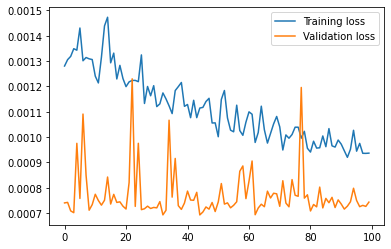

In [194]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [195]:
mse = model.evaluate(X_test,y_test)
mse

14/14 [==============================] - 0s 7ms/step - loss: 0.0045


0.0044619617983698845

In [196]:
# banyak anomali pada data test
df2_test = df2[-len(y_test):].reset_index(drop=True)
df2_test['value_hat'] = scaler2.inverse_transform(model.predict(X_test))
df2_test

timestamp  value  is_anomaly    scaled    value_hat
0         1005   1165           0  0.081168  1000.268677
1         1006   1270           0  0.088483  1147.444824
2         1007   1142           0  0.079565  1117.889404
3         1008    888           0  0.061869  1029.954956
4         1009    593           0  0.041315   848.619385
..         ...    ...         ...       ...          ...
415       1420   2961           1  0.206298  2680.937500
416       1421   4302           1  0.299728  3408.379883
417       1422   3380           1  0.235491  4284.727051
418       1423   3688           1  0.256950  3378.889648
419       1424   3889           1  0.270954  3796.168701

[420 rows x 5 columns]

Text(0, 0.5, 'value')

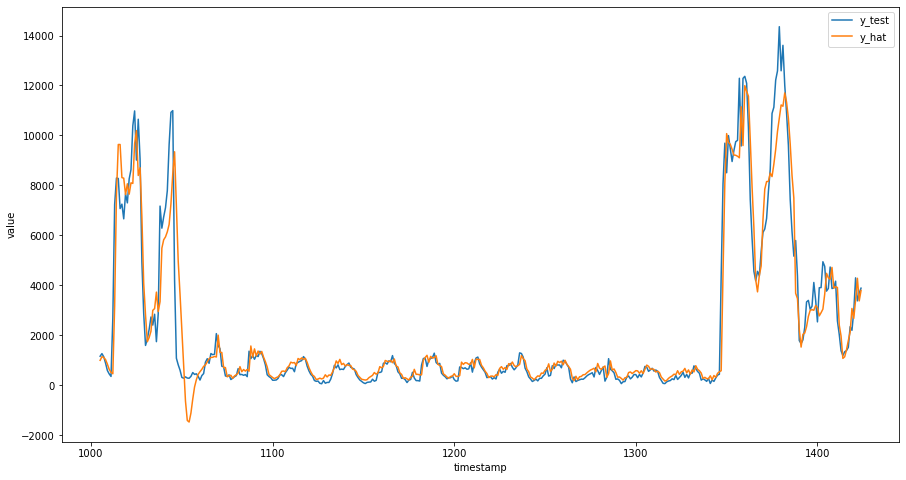

In [197]:
# Plot Data Test
plt.figure(figsize=(15,8))
sns.lineplot(data = df2_test, x='timestamp', y='value', label = 'y_test')
sns.lineplot(data = df2_test, x='timestamp', y='value_hat', label = 'y_hat')
plt.ylabel('value')

threshold error mutlak: 0.024297926945839328


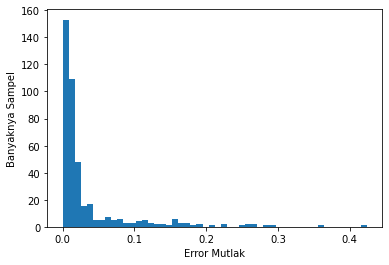

In [198]:
test_abs_error = np.abs(y_test - model.predict(X_test))

plt.hist(test_abs_error, bins=50)
plt.xlabel('Error Mutlak')
plt.ylabel('Banyaknya Sampel')

threshold = float(sorted(test_abs_error)[-N_anom_test])
print(f'threshold error mutlak: {threshold}')

In [199]:
test_score_df2 = pd.DataFrame()
test_score_df2['timestamp'] = df2_test['timestamp']
test_score_df2['value'] = df2_test['value']
test_score_df2['loss'] = test_abs_error
test_score_df2['threshold'] = threshold
test_score_df2['is_anomaly'] = df2_test['is_anomaly']
test_score_df2['anomaly_hat'] = 0
test_score_df2.loc[test_score_df2.loss >= test_score_df2.threshold, 'anomaly_hat'] = 1

test_score_df2.head(10)

timestamp  value      loss  threshold  is_anomaly  anomaly_hat
0       1005   1165  0.011477   0.024298           0            0
1       1006   1270  0.008539   0.024298           0            0
2       1007   1142  0.001680   0.024298           0            0
3       1008    888  0.009890   0.024298           0            0
4       1009    593  0.017809   0.024298           0            0
5       1010    457  0.012739   0.024298           0            0
6       1011    357  0.011271   0.024298           0            0
7       1012   2704  0.156034   0.024298           1            1
8       1013   7238  0.282700   0.024298           1            1
9       1014   8297  0.045849   0.024298           1            1

In [200]:
anomalies_true = test_score_df2.loc[test_score_df2['is_anomaly'] == 1]
anomalies_pred = test_score_df2.loc[test_score_df2['anomaly_hat'] == 1]

In [201]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [209]:
# confusion matrix
matrix = confusion_matrix(test_score_df2['is_anomaly'], test_score_df2['anomaly_hat'])

# recall: tp / (tp + fn)
recall = recall_score(test_score_df2['is_anomaly'], test_score_df2['anomaly_hat'])

# ROC AUC
auc = roc_auc_score(test_score_df2['is_anomaly'], test_score_df2['anomaly_hat'])


print(matrix)
print('Sensitivity: %f' % recall)
print('ROC AUC: %f' % auc)

[[278  29]
 [ 29  84]]
Sensitivity: 0.743363
ROC AUC: 0.824450


In [203]:
# grafik nilai error mutlak dan threshold
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df2['timestamp'], y=test_score_df2['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df2['timestamp'], y=test_score_df2['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [207]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df2['timestamp'], y=test_score_df2['value'], name='value'))
fig.add_trace(go.Scatter(x=anomalies_true['timestamp'], y=anomalies_true['value'], mode='markers', name='Anomaly True'))
fig.add_trace(go.Scatter(x=anomalies_pred['timestamp'], y=anomalies_pred['value'], mode='markers', name='Anomaly Pred'))
fig.update_layout(showlegend=True, title='Detected anomalies')
fig.show()